In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_rel, norm, shapiro, normaltest

In [26]:
df = pd.read_csv("all_plane_crash_data.csv", parse_dates=[0], date_format="%d-%m-%Y %H:%M")
df.head()

,Date,Type_of_aircraft,Operator,Registration,Flight_Phase,Flight_Type,Survivors,Site,Schedule,MSN,...,Pax_fatalities,Other_fatalities,Total_fatalities,Flight_number,Captain_Total_flying_hours,Captain_Total_hours_on_type,Copilot_Total_flying_hours,Copilot_Total_hours_on_type,Aircraft_flight_hours,Aircraft_flight_cycles
0,1919-04-22 02:30:00,Handley Page H.P.12,NaN,F3748,Takeoff (climb),Training,Yes,Airport (less than 10 km from airport),Andover - Andover,NaN,...,3.0,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1919-04-26 00:00:00,De Havilland DH.4,NaN,68,Flight,Postal (mail),NaN,"Plain, Valley",NaN,NaN,...,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1919-05-01 05:30:00,De Havilland DH.9,NaN,G-EAAA,Flight,Postal (mail),No,"Plain, Valley",Hendon - Bournemouth,C6054,...,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1919-05-02 00:00:00,De Havilland DH.4,NaN,AS-32084,NaN,Military,NaN,Airport (less than 10 km from airport),NaN,NaN,...,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1919-05-03 00:00:00,De Havilland DH.4,NaN,AS-22853,NaN,Military,NaN,Airport (less than 10 km from airport),NaN,NaN,...,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.describe()

,Date,YOM,Crew_on_board,Crew_fatalities,Pax_on_board,Pax_fatalities,Other_fatalities,Total_fatalities,Captain_Total_flying_hours,Captain_Total_hours_on_type,Copilot_Total_flying_hours,Copilot_Total_hours_on_type,Aircraft_flight_hours,Aircraft_flight_cycles
count,37557,26876.000000,37541.000000,37556.000000,37515.000000,37554.000000,37541.000000,37557.000000,6912.000000,5874.000000,2246.000000,2005.000000,5738.000000,1475.000000
mean,1962-08-06 22:15:54.585829504,1936.559570,3.365121,1.947572,5.996428,2.858737,0.091553,4.902149,7300.219763,1535.069799,4634.351291,1015.266334,12031.068491,15091.972203
min,1919-04-22 02:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,1942-01-03 00:00:00,1941.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2601.500000,158.000000,1350.000000,142.000000,2677.250000,3795.000000
50%,1952-04-05 08:27:00,1953.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,5576.500000,614.500000,3186.000000,470.000000,6899.000000,10107.000000
75%,1982-05-04 23:45:00,1973.000000,5.000000,3.000000,3.000000,0.000000,0.000000,5.000000,10400.250000,2000.000000,6182.500000,1245.000000,15607.000000,20940.000000
max,2025-07-26 17:32:00,19567.000000,1942.000000,25.000000,509.000000,506.000000,297.000000,520.000000,50233.000000,23000.000000,34189.000000,16849.000000,200845.000000,108882.000000
std,NaN,254.109223,17.476051,2.485349,21.446075,13.521207,2.355456,14.786613,6102.481398,2267.623075,4661.209408,1461.044197,14735.356376,15610.015821


<Figure size 2000x4000 with 0 Axes>

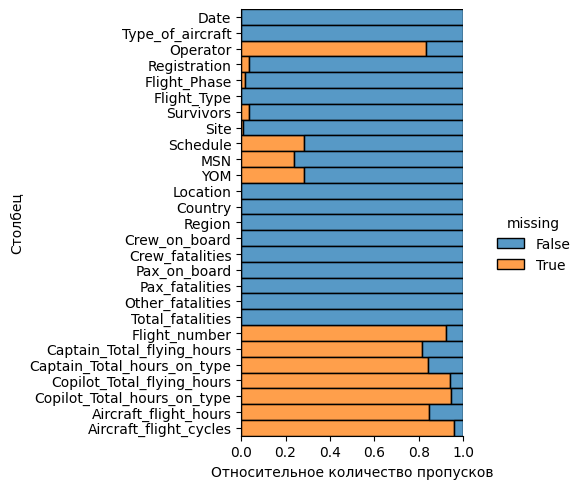

In [28]:
plt.figure(figsize=(20,40))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
)
plt.xlabel("Относительное количество пропусков")
plt.ylabel("Столбец")
plt.show()

In [29]:
df.dropna(thresh = df.shape[0]/3, axis = 1, inplace = True)

<Axes: xlabel='Количество крушений', ylabel='Тип самолёта'>

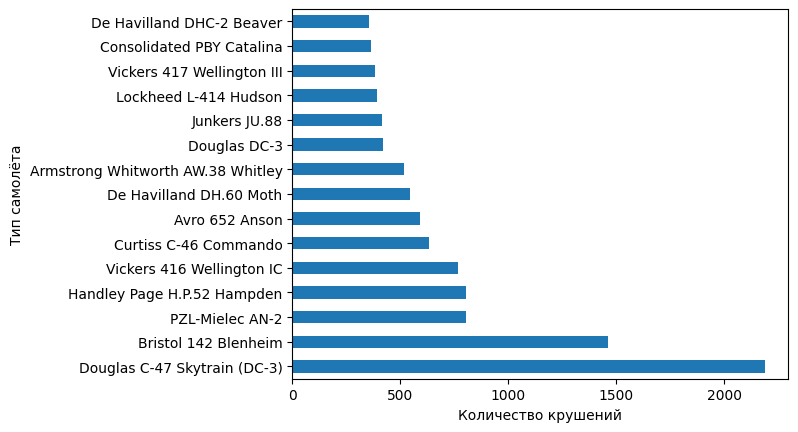

In [30]:
df["Type_of_aircraft"].value_counts().head(15).plot(
    kind="barh", 
    ylabel="Тип самолёта",
    xlabel="Количество крушений"
)

<Axes: xlabel='Количество крушений', ylabel='Страна'>

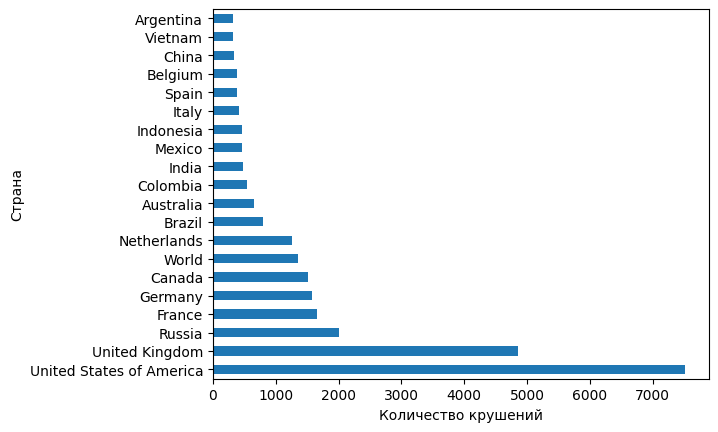

In [31]:
df["Country"].value_counts().head(20).plot(
    kind="barh", 
    ylabel="Страна",
    xlabel="Количество крушений")

In [32]:
dfBoB = df[(pd.Timestamp(1940, 7, 10) <= df["Date"]) & (df["Date"] <= pd.Timestamp(1940, 10, 30))]

In [33]:
dfBoB["Type_of_aircraft"].value_counts()

Type_of_aircraft
Bristol 142 Blenheim                 186
Handley Page H.P.52 Hampden          119
Heinkel He.111                        66
Armstrong Whitworth AW.38 Whitley     61
Junkers JU.88                         55
Vickers 416 Wellington IC             53
Dornier DO.17                         30
Avro 652 Anson                        16
Airspeed AS.10 Oxford                 13
Dornier DO.18                         10
Lockheed L-414 Hudson                  9
Vickers 408 Wellington IA              9
Vickers 290 Wellington I               8
Bristol 130 Bombay                     5
Junkers JU.52                          5
Bristol 152 Beaufort                   5
Martin B-10 (Model 139 & 166)          4
Junkers JU.86                          4
Savoia-Marchetti SM.79 Sparviero       3
Focke-Wulf Fw.200 Condor               3
Junkers W.34                           3
Douglas DC-3                           3
Grumman G-21A Goose                    2
Douglas B-18 Bolo                      2

In [34]:
dfBoB[dfBoB["Type_of_aircraft"] == "Savoia-Marchetti SM.79 Sparviero"]

,Date,Type_of_aircraft,Registration,Flight_Phase,Flight_Type,Survivors,Site,Schedule,MSN,YOM,Location,Country,Region,Crew_on_board,Crew_fatalities,Pax_on_board,Pax_fatalities,Other_fatalities,Total_fatalities
5337,1940-07-10 08:00:00,Savoia-Marchetti SM.79 Sparviero,NaN,Flight,Bombing,No,"Plain, Valley",NaN,NaN,NaN,Torri ta' Triq il-Wiesgħa Malta,Malta,Europe,4.0,4.0,0.0,0.0,0.0,4
5365,1940-07-16 00:00:00,Savoia-Marchetti SM.79 Sparviero,MM60399,Takeoff (climb),Military,Yes,Airport (less than 10 km from airport),Benghazi - Gondar,19052,NaN,Benghazi-Benina Benghazi (بنغازي),Libya,Africa,4.0,0.0,0.0,0.0,0.0,0
5956,1940-10-15 00:00:00,Savoia-Marchetti SM.79 Sparviero,NaN,Flight,Bombing,No,"Lake, Sea, Ocean, River",NaN,NaN,NaN,Aden 'Adan (عدن),Yemen,Asia,5.0,5.0,0.0,0.0,0.0,5


<Axes: xlabel='Количество крушений в Битве за Британию', ylabel='Тип самолёта'>

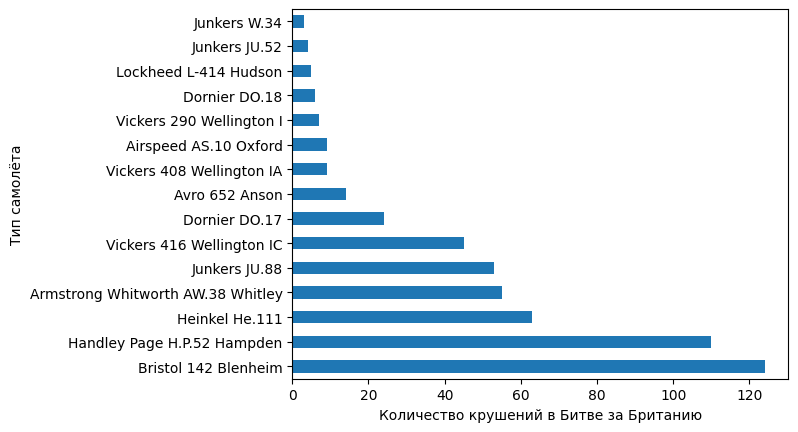

In [35]:
dfBoB[dfBoB["Region"] == "Europe"]["Type_of_aircraft"].value_counts().head(15).plot(
    kind="barh", 
    ylabel="Тип самолёта",
    xlabel="Количество крушений в Битве за Британию")

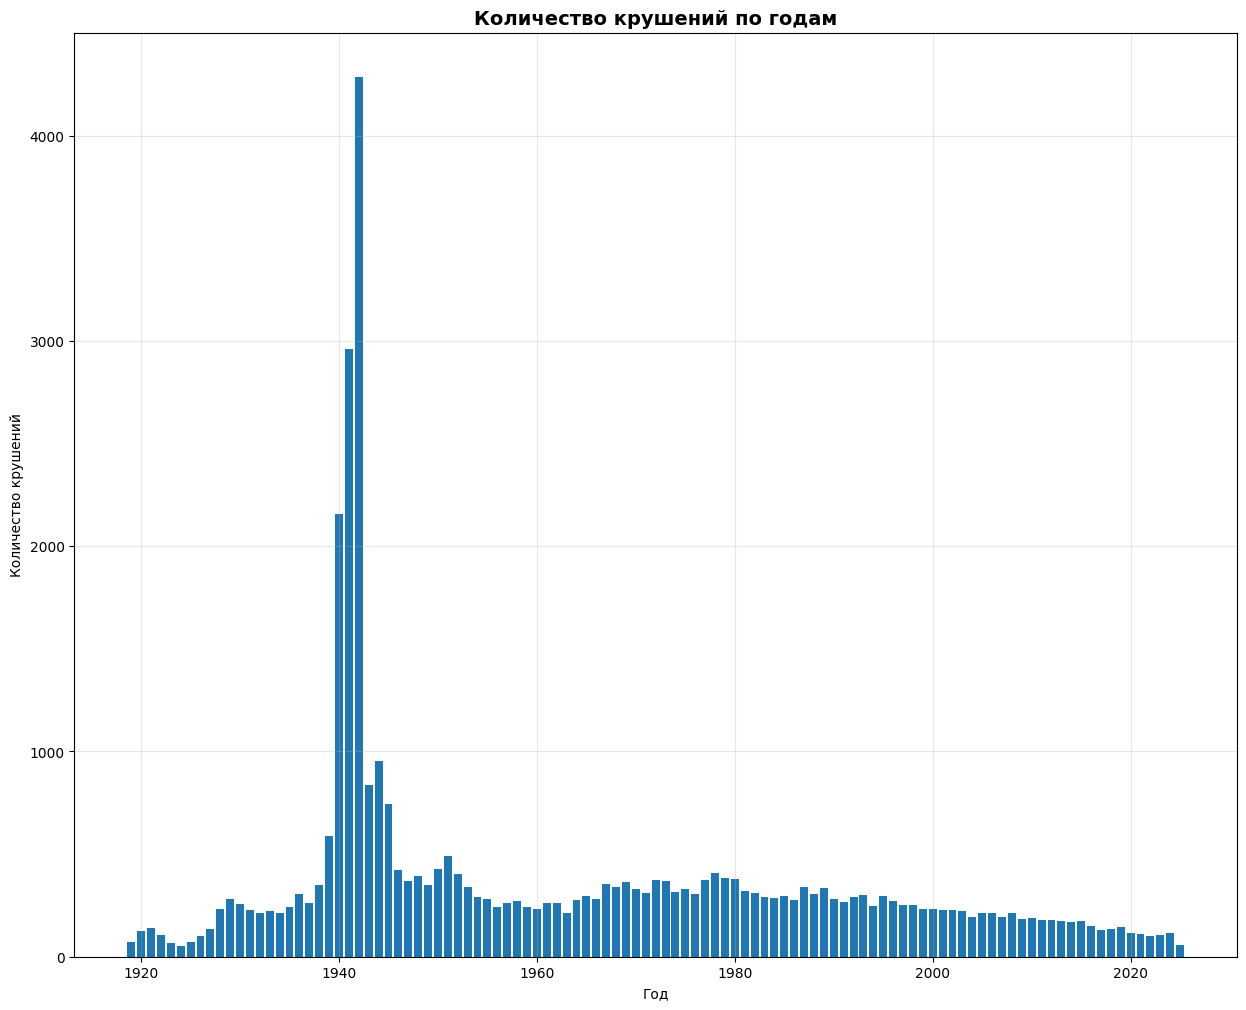

In [36]:
plt.figure(figsize=(15, 12))

crashes_by_year = df.groupby(df["Date"].dt.year).size()
plt.bar(crashes_by_year.index, crashes_by_year.values, linewidth=2)
plt.title('Количество крушений по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Количество крушений')
plt.grid(True, alpha=0.3)

<Axes: xlabel='Количество крушений за 1942 год', ylabel='Тип самолёта'>

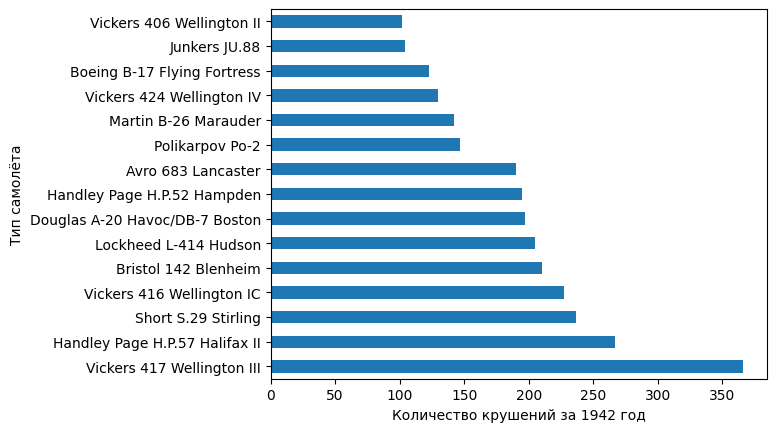

In [37]:
df[df["Date"].dt.year == 1942]["Type_of_aircraft"].value_counts().head(15).plot(
    kind="barh", 
    ylabel="Тип самолёта",
    xlabel="Количество крушений за 1942 год"
)

<Axes: title={'center': 'Количество крушений по фазам полёта до 1980 года'}, xlabel='Количество крушений', ylabel='Фаза полёта, на которой произошло крушение'>

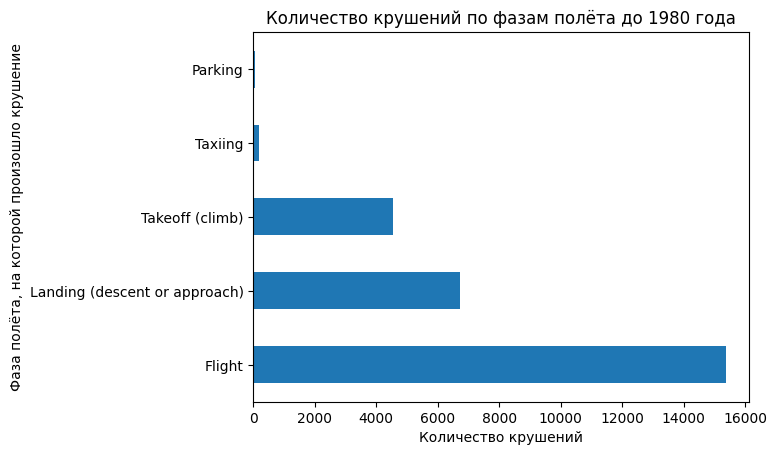

In [38]:
df[df["Date"] <= pd.Timestamp(1980, 1, 1)]["Flight_Phase"].value_counts().plot(
    kind="barh",
    xlabel="Количество крушений",
    ylabel="Фаза полёта, на которой произошло крушение",
    title="Количество крушений по фазам полёта до 1980 года"
)

<Axes: title={'center': 'Количество крушений по фазам полёта после 1980 года'}, xlabel='Количество крушений', ylabel='Фаза полёта, на которой произошло крушение'>

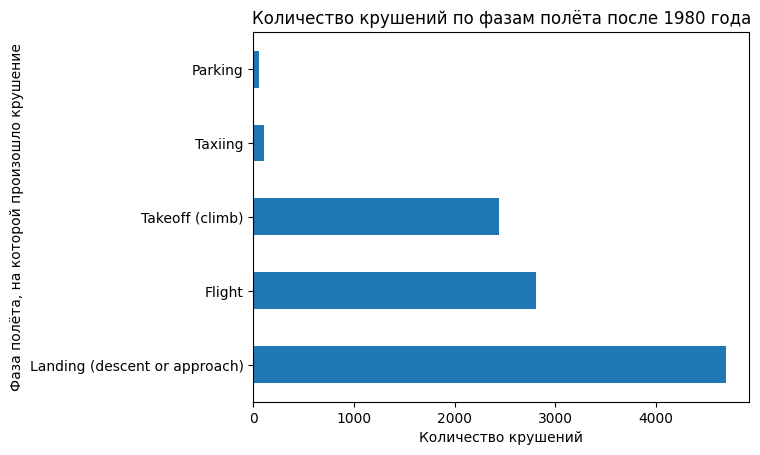

In [39]:
df[df["Date"] > pd.Timestamp(1980, 1, 1)]["Flight_Phase"].value_counts().plot(
    kind="barh",
    xlabel="Количество крушений",
    ylabel="Фаза полёта, на которой произошло крушение",
    title="Количество крушений по фазам полёта после 1980 года"
)

<Axes: title={'center': 'Количество крушений по локациям до 1980 года'}, xlabel='Количество крушений', ylabel='Локация, в которой произошло крушение'>

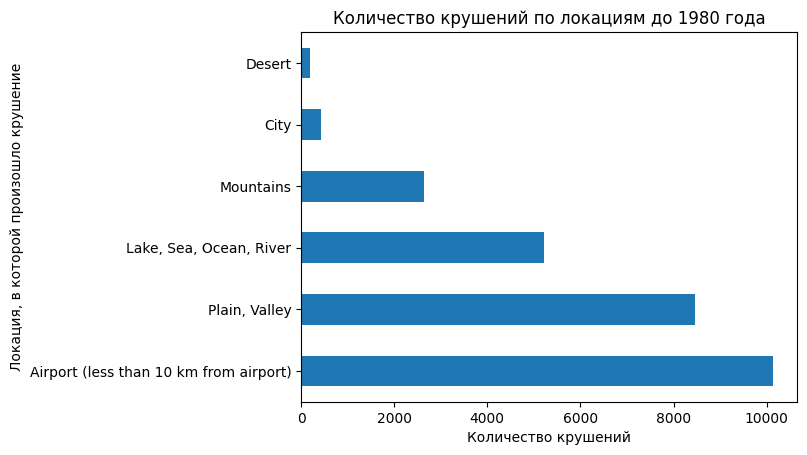

In [40]:
df[df["Date"] <= pd.Timestamp(1980, 1, 1)]["Site"].value_counts().plot(
    kind="barh",
    xlabel="Количество крушений",
    ylabel="Локация, в которой произошло крушение",
    title="Количество крушений по локациям до 1980 года"
)

<Axes: title={'center': 'Количество крушений по локациям после 1980 года'}, xlabel='Количество крушений', ylabel='Локация, в которой произошло крушение'>

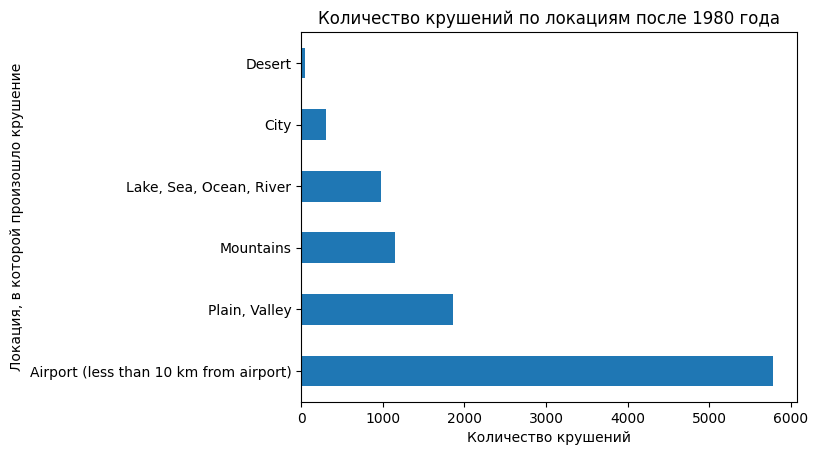

In [41]:
df[df["Date"] > pd.Timestamp(1980, 1, 1)]["Site"].value_counts().plot(
    kind="barh",
    xlabel="Количество крушений",
    ylabel="Локация, в которой произошло крушение",
    title="Количество крушений по локациям после 1980 года"
)

Нормальность рапределения числа погибших

Text(0, 0.5, 'Квантили выборки')

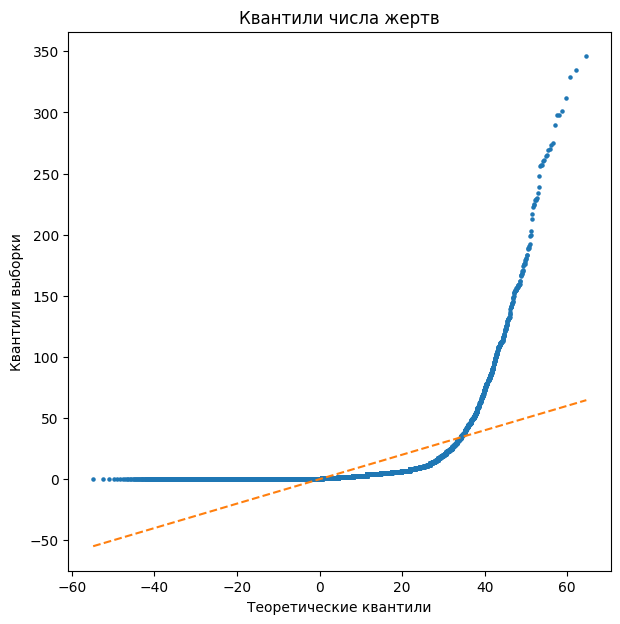

In [55]:
fatalities = df['Total_fatalities']
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
    
loc = fatalities.mean()
scale = fatalities.std()

interval = np.linspace(0, 1, fatalities.shape[0])[1:-1]
x = stats.norm.ppf(interval, loc=loc, scale=scale)
y = np.quantile(fatalities, interval)

ax.scatter(x, y, s=5)
ax.plot(x, x, color='C1', linestyle='dashed')

ax.set_title("Квантили числа жертв")
ax.set_xlabel('Теоретические квантили')
ax.set_ylabel('Квантили выборки')

In [43]:
shapiro_stat, shapiro_p = shapiro(fatalities)
if shapiro_p < 0.05:
    print("Не нормальное распределение")
else:
    print("Нормальное распределение")

Не нормальное распределение


c:\Users\budni\PycharmProjects\ML2025\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37557.
  res = hypotest_fun_out(*samples, **kwds)


In [44]:
confidence = 0.95
ci_low, ci_high = stats.t.interval(confidence, len(fatalities)-1, 
                                    loc=fatalities.mean(), 
                                    scale=stats.sem(fatalities))
ci_low, ci_high

(np.float64(4.752599100723792), np.float64(5.051698367125077))

Число жертв среди экипажа равно числу членов экипажа

In [45]:
data_for_plot = df[(df["Crew_on_board"] < 30) & (df["Crew_fatalities"] <= df["Crew_on_board"])][["Crew_on_board", "Crew_fatalities"]]
t_stat, p_value = ttest_rel(data_for_plot["Crew_on_board"], data_for_plot["Crew_fatalities"])
p_value

np.float64(0.0)

Text(0, 0.5, 'Жертвы среди экипажа')

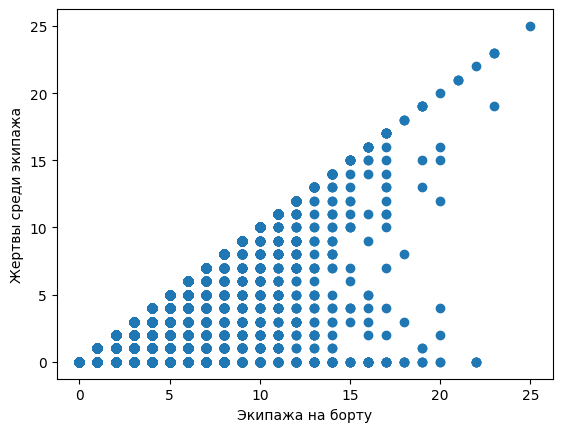

In [47]:
data_for_plot.dropna()
plt.scatter(data_for_plot["Crew_on_board"], data_for_plot["Crew_fatalities"])
plt.xlabel("Экипажа на борту")
plt.ylabel("Жертвы среди экипажа")